In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string

In [8]:
df_train = pd.read_csv('train.csv', encoding='latin1')
df_test = pd.read_csv('test.csv', encoding='latin1')

In [9]:
df = pd.concat([df_train,df_test])

In [10]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [11]:
df = df[["text","selected_text","sentiment"]]

In [12]:
df.shape

(32296, 3)

In [13]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [14]:
df.isna().sum()

text             1282
selected_text    4816
sentiment        1281
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text

In [17]:
df['text']= df['text'].apply(lambda x:remove_unnecessary_characters(x))

In [18]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []

In [19]:
df['tokens'] = df['text'].apply(tokenize_text)

In [20]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text

In [21]:
df['text'] = df['text'].apply(normalize_text)

In [22]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text

In [23]:
"not" in stopwords.words('english')

True

In [24]:
df['text'] = df['text'].apply(remove_stopwords)

In [25]:
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
    
df['selected_text'] = df["selected_text"].apply(wp)

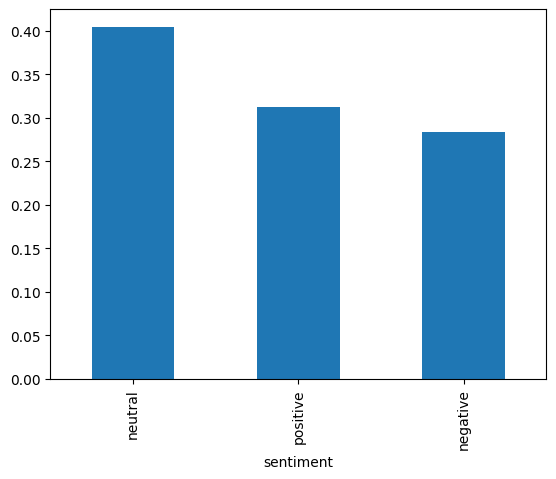

In [26]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [27]:
df['sentiment'] = df['sentiment'].map({'negative' : 0, 'positive': 1, 'neutral': 2})

In [28]:
count_vectorizer = CountVectorizer(stop_words="english")

In [29]:
X = df['selected_text']
y = df['sentiment']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.3,stratify=y)

In [31]:
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [32]:
model = MultinomialNB()
model.fit(count_train,y_train)

MultinomialNB()

In [33]:
pred = model.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
score

0.7668607472100922

In [34]:
alphas = np.arange(0,1,0.1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train,y_train)
    pred = nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test,pred)
    return score

alpha_val = []
score = []

for alpha in alphas:
    print('Alpha: ', alpha)
    alpha_val.append(alpha)
    print('Score: ', train_and_predict(alpha))
    score.append(train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.749757399320718

Alpha:  0.1
Score:  0.7737748665696264

Alpha:  0.2
Score:  0.7731683648714216

Alpha:  0.30000000000000004
Score:  0.7734109655507035

Alpha:  0.4
Score:  0.7717127607957303

Alpha:  0.5
Score:  0.7712275594371665

Alpha:  0.6000000000000001
Score:  0.7691654536632703

Alpha:  0.7000000000000001
Score:  0.7690441533236293

Alpha:  0.8
Score:  0.7685589519650655

Alpha:  0.9
Score:  0.767224648229015



/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


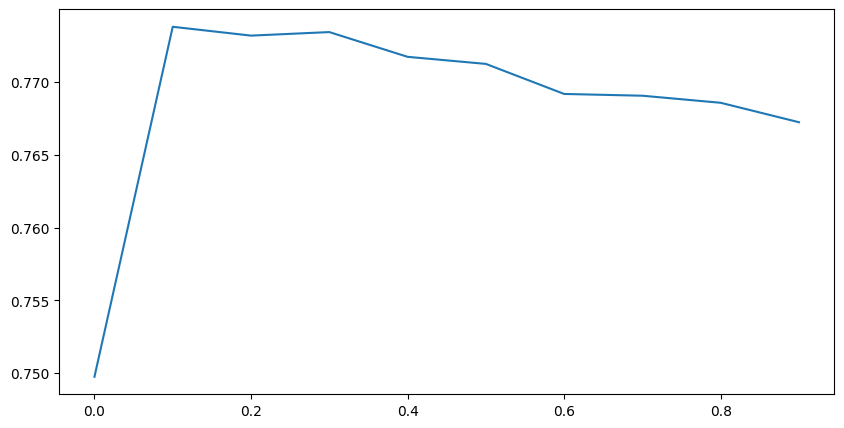

In [35]:
plt.figure(figsize=(10,5))
plt.plot(alpha_val,score)
plt.show()

In [36]:
best_model = MultinomialNB(alpha=0.1)
best_model.fit(count_train,y_train)
pred = best_model.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
score

0.7737748665696264

In [41]:
def output_lable(n,text):
    if n == 0:
        return f"The sentence '{text}' : \n --> Sentement is Negative"
    elif n == 2:
        return f"The sentence '{text}' : \n --> Sentement is Neutral"
    elif n == 1:
        return f"The sentence '{text}' : \n --> Sentement is Positive"

In [42]:
new_text = ["i am depressed","i am overwhelmed"]
new_features = count_vectorizer.transform(new_text)
prediction = best_model.predict(new_features)
for text,pred in zip(new_text,prediction):
    print(output_lable(pred,text))

The sentence 'i am depressed' : 
 --> Sentement is Negative
The sentence 'i am overwhelmed' : 
 --> Sentement is Negative


In [39]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()

RFC_model.fit(count_train, y_train)

y_pred = RFC_model.predict(count_test)

metrics.accuracy_score(y_test, y_pred)

0.7535177098495875

In [55]:
new_text = ["I am happy","i`m sad","I work at Softylines"]
new_features = count_vectorizer.transform(new_text)
prediction = RFC_model.predict(new_features)

for text,pred in zip(new_text,prediction):
    print(output_lable(pred,text))

The sentence 'I am happy' : 
 --> Sentement is Positive
The sentence 'i`m sad' : 
 --> Sentement is Negative
The sentence 'I work at Softylines' : 
 --> Sentement is Neutral
